LOGISTIC REGRESSION
1)What is logistic regresssion
2) What is sigmoid function - what it does in logistic regresssion
3) Why cant we use linear regresssion in problems where the output label is discrete


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('/content/Simmons.xls')
df.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [3]:
#Find the length of the dataset
len(df)

100

In [4]:
#filling null values
df.isna().sum()

Customer    0
Spending    0
Card        0
Coupon      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
#Describe your dataset
df.describe()

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [7]:
# Find the shape of the dataset
df.shape

(100, 4)

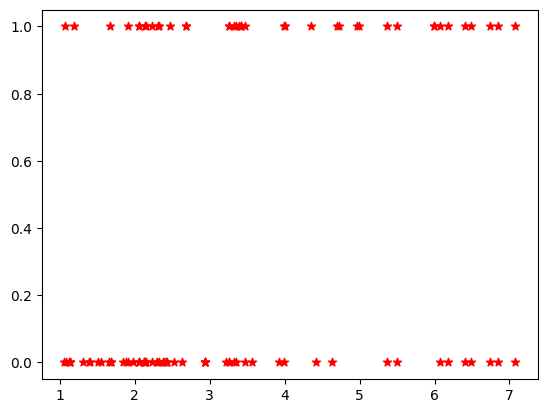

In [8]:
#Plot the scatter plot of spending and coupon and justify the graph
plt.scatter(df['Spending'], df['Coupon'], marker = '*', color = 'red')

In [9]:
#  x determines the independent variables
#x=df.drop(['Coupon', 'Customer'], axis=1 )
x = df[['Spending', 'Card']]
# y represents dependent variable
y=df['Coupon']

OR
x = df.iloc[:,1:3]
y = df.iloc[:,3]

In [10]:
x

,Spending,Card
0,2.291,1
1,3.215,1
2,2.135,1
3,3.924,0
4,2.528,1
...,...,...
95,3.318,0
96,2.421,1
97,6.073,0
98,2.630,1


In [11]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    1
Name: Coupon, Length: 100, dtype: int64

In [12]:
# from sklearn library import model_selection module and train_test_split function
from sklearn.model_selection import train_test_split

In [13]:
#Split the data into random train and test subsets
#random_state is the seed used by the random number generator;
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)


In [14]:
#Logistic Regression (aka logit) classifier. Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
# create the object of class LogisticRegression
logmodel = LogisticRegression()
#fit-Fit the model according to the given training data.
logmodel.fit(x_train, y_train)

LogisticRegression()

In [15]:
# do the predictions on x_test
predictions = logmodel.predict(x_test)
predictions

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [16]:
#predict Probability estimates using predict_proba
prob = logmodel.predict_proba(x_test)
prob

array([[0.34205601, 0.65794399],
       [0.76107428, 0.23892572],
       [0.58701304, 0.41298696],
       [0.31506144, 0.68493856],
       [0.31065746, 0.68934254],
       [0.46337996, 0.53662004],
       [0.61202787, 0.38797213],
       [0.53184912, 0.46815088],
       [0.76450974, 0.23549026],
       [0.49509649, 0.50490351],
       [0.37314736, 0.62685264],
       [0.77110125, 0.22889875],
       [0.53489588, 0.46510412],
       [0.64318576, 0.35681424],
       [0.74784036, 0.25215964],
       [0.34974311, 0.65025689],
       [0.49685384, 0.50314616],
       [0.69020399, 0.30979601],
       [0.47675934, 0.52324066],
       [0.54624978, 0.45375022],
       [0.54655938, 0.45344062],
       [0.51277761, 0.48722239],
       [0.5435772 , 0.4564228 ],
       [0.49666648, 0.50333352],
       [0.52299847, 0.47700153],
       [0.55613784, 0.44386216],
       [0.59137521, 0.40862479],
       [0.76450974, 0.23549026],
       [0.58222871, 0.41777129],
       [0.80394809, 0.19605191],
       [0.

In [17]:
# create a datafreme for actual and predicted values
d = pd.DataFrame({"Actual value": y_test, "predicted values": predictions})
d

,Actual value,predicted values
80,1,1
84,1,0
33,0,0
81,1,1
93,1,1
17,0,1
36,0,0
82,0,0
69,0,0
65,0,1


In [18]:
# from sklearn.meterics import a function called classification_report to see the performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.64      0.54      0.58        13

    accuracy                           0.70        33
   macro avg       0.68      0.67      0.67        33
weighted avg       0.69      0.70      0.69        33



In [19]:
#Create a confusion matrix by importing the function confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score
confusion= confusion_matrix(y_test, predictions)
confusion

array([[16,  4],
       [ 6,  7]])

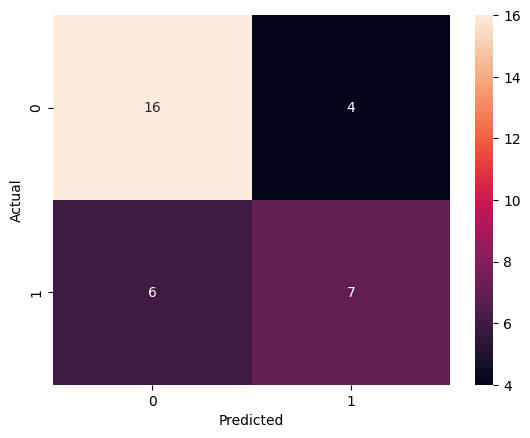

In [20]:
# Make a nice graphical confusion matrix
sns.heatmap(confusion, annot = True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
#Accuracy score is the percentage of correct accuracy of the predictions made by the model.
accuracy_score(y_test, predictions)

0.696969696969697

In [22]:
# Find the slope coefficients for logistic regression for the two independent variables
logmodel.coef_

array([[0.24982886, 0.9717996 ]])

In [23]:
# Find the intercept
logmodel.intercept_

array([-1.69196285])

In [24]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [25]:
print('MAE :',metrics.mean_absolute_error(y_test,predictions))
print('MSE :',metrics.mean_squared_error(y_test,predictions))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE : 0.30303030303030304
MSE : 0.30303030303030304
RMSE : 0.5504818825631803


In [26]:
print('R2 SCORE: ',metrics.r2_score(y_test,predictions))

R2 SCORE:  -0.26923076923076916
